In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp



In [30]:
def dEdt(t, E, k1, k2, k3, r_a, r_c):
    a, b, c, a_tild, c_tild = E
    return [k1*(b - a) + k2*(b**2 - a*b) - r_a*a + r_a*a_tild,
            k1*(a - b) + k2*(a*b - b**2) + k3*(c - b),
            k3*(b - c) + r_c - r_c*c - r_c*c + r_c*c_tild,
            -r_a*a_tild + r_a*a,
            -r_c*c_tild + r_c*c]
a0 = 1; b0 = 2; c0 = 3; a0_tild = 2; c0_tild = 4; E0 = (a0, b0, c0, a0_tild, c0_tild)
r_a = 1; r_c = 1
t = np.linspace(0, 20, 10000)

sol = odeint(dEdt, y0 = E0, t = t, args = (1, 1, 1, r_a, r_c), tfirst=True) 

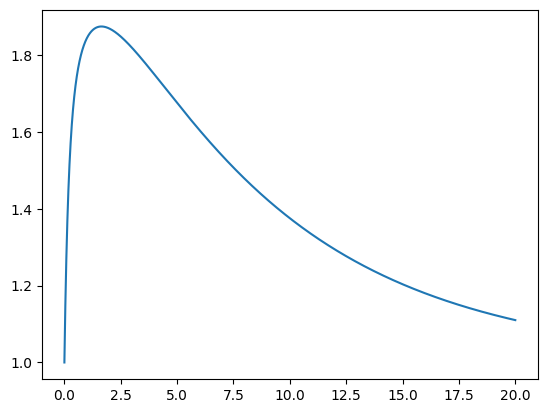

In [32]:
plt.plot(t, a_sol, label = "[A]")
plt.show()

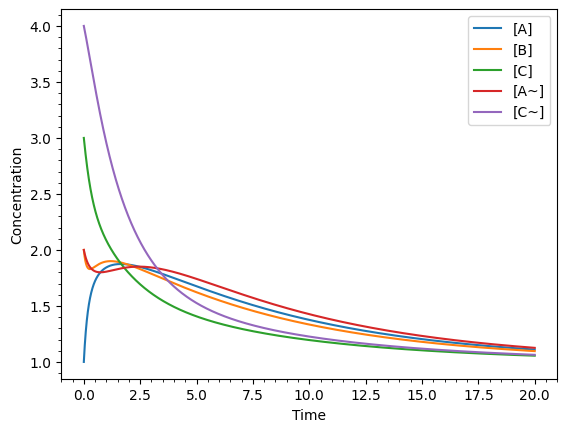

In [33]:
plt.plot(t, sol.T[0], label = "[A]")
plt.plot(t, sol.T[1], label = "[B]")
plt.plot(t, sol.T[2], label = "[C]")
plt.plot(t, sol.T[3], label = "[A~]")
plt.plot(t, sol.T[4], label = "[C~]")

plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.minorticks_on()
plt.show()
